In [1]:
import platform
import matplotlib
from matplotlib import font_manager

In [2]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

### 랜덤포레스트 모델 만들기

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import mglearn
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# 02 데이터 셋 나누기 및 학습
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                       stratify=cancer.target, random_state=42)

In [5]:
model = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 트리 
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


In [6]:
model.estimators_


[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

In [7]:
# 5개의 모델에 대한 정확도 평가
for one_model in model.estimators_:
    print("학습용 세트 정확도 : {:.3f}".format(one_model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(one_model.score(X_test, y_test)))
    print()

학습용 세트 정확도 : 0.986
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.981
테스트 세트 정확도 : 0.944

학습용 세트 정확도 : 0.962
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.986
테스트 세트 정확도 : 0.944

학습용 세트 정확도 : 0.965
테스트 세트 정확도 : 0.909



### 실습 2-1
 * 10개의 모델을 이용한다. model.estimators_로 찍어보고 정확도 확인해보기

In [8]:
# model : 모델
# 데이터 셋
def plot_feature_important_common(model, dataset, col_names):
  imp = model.feature_importances_                   # feature의 중요도 
  n_features = dataset.shape[1]
  feature_names = col_names

  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    
  plt.yticks(np.arange(n_features), feature_names)   # y축 값 지정

  plt.xlabel("feature importance")   
  plt.ylabel("feature")              
  plt.ylim(-1, n_features)      

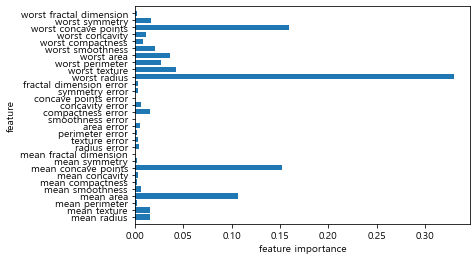

In [9]:
n_fea = cancer.data.shape[1]
plot_feature_important_common(model, cancer.data, cancer.feature_names)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
m = RandomForestClassifier(n_estimators=10, random_state=2) # 5개의 트리
m.fit(X_train, y_train)

(100, 2) (100,)


RandomForestClassifier(n_estimators=10, random_state=2)

In [11]:
m.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511)]

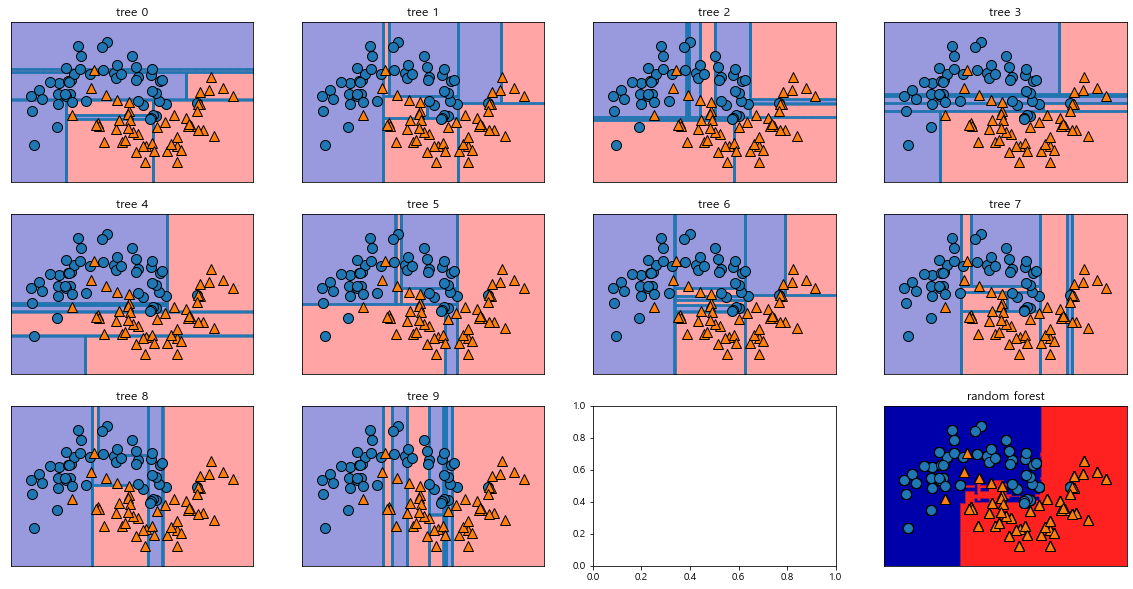

In [12]:
fig, axes = plt.subplots(3,4, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), m.estimators_)):
    ax.set_title("tree {}".format(i))  # 각 그래프 제목
    
    # 그래프 그리기 
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    mglearn.plots.plot_2d_separator(m, X, fill=True, ax=axes[-1,-1], alpha=.4)
    axes[-1, -1].set_title("random forest")
    
    mglearn.discrete_scatter(X[:, 0],X[:,1], y)

In [13]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [14]:
tips_have = tips.iloc[ 0:220, :]  # 현재 가진 고객 데이터
tips_new  = tips.iloc [220: , :]  # 미래의 고객 데이터 

tips_new.drop(["size"], axis=1, inplace=True)

tips_have.shape, tips_new.shape

C:\Users\gmlck\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((220, 7), (24, 6))

In [16]:
sel = ['total_bill', 'tip']

In [18]:
# sel = ['total_bill', 'tip']

X = tips_have[sel]
y = tips_have['size']  # 우리가 예측할 컬럼(변수)

test_X = tips_new[sel]       # 예측할 친구는 다른 데이터 셋

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() # 모델 만들기
model.fit(X, y)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(test_X)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 4], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split

# random_state는 난수 발생기의 패턴을 고정시키기 위해 사용한다.
# 이를 통해 우리는 X(입력), y(출력)이 각각 학습용, 테스트용으로 나누어진다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
model = RandomForestClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2], dtype=int64)

In [22]:
pred == y_test  # 행별로 맞으면 True, 틀리면 False가 된다.


152    False
74      True
71     False
161     True
162     True
143    False
63     False
153    False
219    False
135     True
149     True
5      False
90     False
168     True
202     True
191     True
201     True
96     False
106     True
75      True
55     False
12      True
157     True
64     False
37     False
130     True
101     True
61      True
8       True
18     False
179    False
15     False
139     True
7      False
124     True
159    False
136     True
144    False
199     True
155    False
66      True
33     False
89      True
158     True
196     True
173     True
185    False
207     True
16      True
145     True
200    False
146    False
22      True
183    False
45      True
Name: size, dtype: bool

In [23]:
(pred == y_test).sum()


31

In [24]:
(pred == y_test).sum() / len(pred)  * 100


56.36363636363636

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = KNeighborsClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

In [27]:
(pred == y_test).sum() / len(pred)  * 100


52.72727272727272

In [28]:
model = DecisionTreeClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 3, 4, 2, 2, 2, 3, 3, 2, 2, 4, 3, 2, 2, 2,
       3, 2, 2, 4, 3, 2, 2, 4, 2, 2, 4], dtype=int64)

In [29]:
import numpy as np
# 정확도
# (pred == y_test).sum() / len(pred)  * 100
np.mean(pred == y_test)


0.4909090909090909